# Making into dataset


* Need to take the 256 3 256 data array into a flattern array
* Make dataset into numpy array

In [82]:
#importing the useful libraries
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Making the images into a dataset

the images will be in key 0 catagories in key 1 
* data[0] will return all the images 
* data[1] will return all the catagories

In [83]:
# This is just making a labled dataset
data = tf.keras.utils.image_dataset_from_directory("dataset",batch_size=672) 
# creates a labled dataset can change the batch size for speed and image size can be set using image_size=(100,100) 
# The batch size is just all the data so will have to make much bigger with more data as currently only have 672 items
data1 = data.as_numpy_iterator() #converts to a numpy iterators
batch = data1.next() # gets the next 32 items16

# Making the labled data set into two numpy arrays 
[x, y ] = [batch[0],batch[1]]
x_in = np.array(x) # all the input x data
y_in = np.array(y) # all the ground truth data with values corrosponding to catagories


Found 672 files belonging to 4 classes.


# Showing off a sample of the labled dataset

This is just for clarification of the labled sets name and association you can ignore it if you want

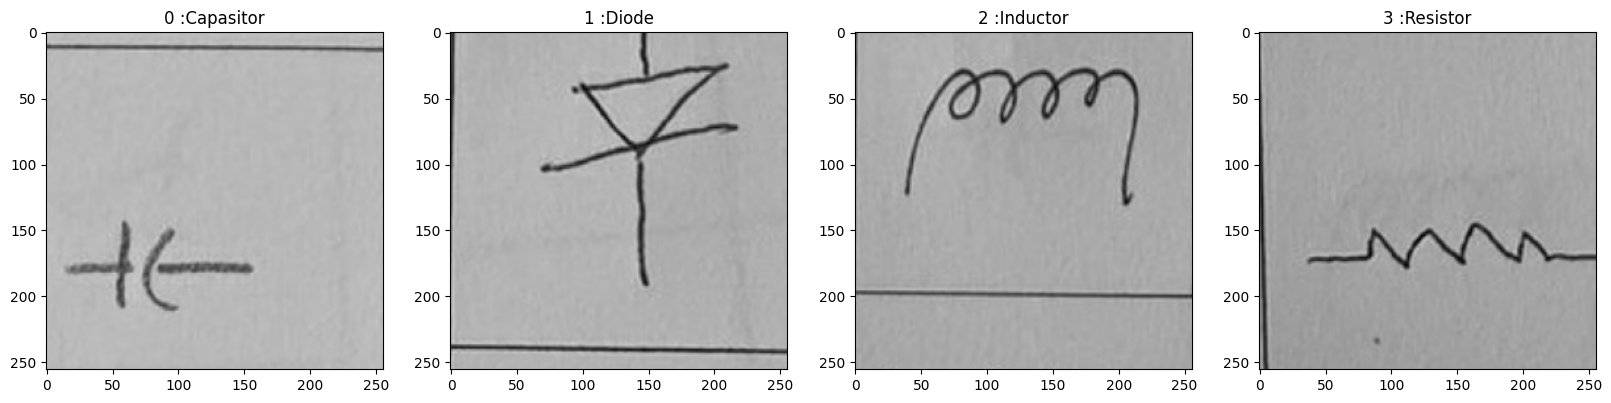

In [100]:
fig, ax = plt.subplots(ncols = 4, figsize = (20,20))

caps_idx = np.where(y == 0)[0][0] 
caps_img = x_in[caps_idx]
ax[0].title.set_text(str(0) +" :Capasitor")
ax[0].imshow(caps_img.astype(int))


inducts_idx = np.where(y ==2)[0][0]
inducts_img = x_in[inducts_idx]
ax[2].title.set_text(str(2) +" :Inductor")
ax[2].imshow(inducts_img.astype(int))

diode_idx = np.where(y ==1)[0][0]
diode_img = x_in[diode_idx]
ax[1].title.set_text(str(1) +" :Diode")
ax[1].imshow(diode_img.astype(int))

resist_idx = np.where(y == 3)[0][0]
resist_img = x_in[resist_idx]

ax[3].title.set_text(str(3) +" :Resistor")
ax[3].imshow(resist_img.astype(int))


# Preproccessing the Data

Steps 
* scale the data from 0-255 to 0-1. this will help account for brightness and stuffs


In [85]:
X_scaled = x_in/255 

# This is where you will do all you magic 

# Splitting the data into data, testing and validation

old code

"""
len(data) # the number of batches
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1 # had to add them all up to total batch size a better way to do this def exists
print(train_size,test_size,val_size)"""

#test  = tf.keras.layers.Flatten()(np.array(batch[0]))

""""
train = data.take(train_size) # splitting up the data between the 3 secitons
val = data.skip(train_size).take(val_size)
testData = data.skip(test_size).skip(val_size).take(test_size+1)
""" 

# This is a three way split to split the data into testing and validation

Makes an equal split of data for training testing and validation \
currently 222 222 222 split

In [86]:

X_train, X_TestAndValid, Y_train, Y_TestAndValid = train_test_split(X_scaled, y_in, test_size=0.66) # splits the whole data into 1/3 for X_train
X_val, X_test, Y_val, Y_test = train_test_split(X_TestAndValid, Y_TestAndValid, test_size=0.5) # split the train and val into 1/3 each
np.shape(X_train[0]) # this is to see the size that your model must account for

(256, 256, 3)

# Begining the buidling the model 
* Sequential model type
* with lots of different types of layers
* Size of the input shape is up to you see np.shape(X_train[0]) to see size

In [87]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense,Flatten, Dropout

In [88]:
model = Sequential()

# All you have to do is to make the system into the correct size
model.add(Conv2D(16,(3,3),1, activation = 'relu', input_shape= (256, 256, 3))) #making a convolutional layer with number of filters = 16, 3x3 window , moves 1 pixel at a time 
model.add(MaxPooling2D()) # max pooling values returns the max value of the highest relu makes much faster

model.add(Conv2D(32,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1, activation = 'relu')) # another filter layer
model.add(MaxPooling2D())


model.add(Flatten()) # flatterns the data down condenses rows and width

model.add(Dense(256, activation= 'relu')) # fully connected layers with 256 neurons
model.add(Dense(4, activation='sigmoid')) # a signle values output might have to change this    

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])
#model.compile('adam',  loss=tf.keras.losses.MeanSquaredLoss()  , metrics=['accuracy']) # using the adam optimiser with losses being 2 values - will have to cahnge this 


c:\Users\tlgwo\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Displaying what the model looks like

In [89]:
model.summary() # just showing what our model is made of

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,697,396 (14.10 MB)

 Trainable params: 3,697,396 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# Training the data

In [90]:
logsdir = 'logs' # don't really use but can be useful
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logsdir) # estabilishing a log directory

# Fitting the data (training)

In [117]:
hist = model.fit(X_train, Y_train, epochs = 20, validation_data=[X_val,Y_val]) # training the data and testing with validation 5 epochs gives 83 

Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step - accuracy: 1.0000 - loss: 3.6289e-05 - val_accuracy: 0.9775 - val_loss: 0.2252
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 151ms/step - accuracy: 1.0000 - loss: 3.7563e-05 - val_accuracy: 0.9775 - val_loss: 0.2252
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 1.0000 - loss: 4.7279e-05 - val_accuracy: 0.9775 - val_loss: 0.2239
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 148ms/step - accuracy: 1.0000 - loss: 2.8153e-05 - val_accuracy: 0.9775 - val_loss: 0.2225
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 154ms/step - accuracy: 1.0000 - loss: 3.0545e-05 - val_accuracy: 0.9775 - val_loss: 0.2196
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 146ms/step - accuracy: 1.0000 - loss: 4.0381e-05 - val_accuracy: 0.9775 - val_loss: 0.2211
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 147ms/step - accuracy: 1.0000 - loss: 3.3270e-05 - val_accuracy: 0.9775 - val_loss: 0.2238
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 143ms/step - accuracy: 1.0000 - loss: 3.1140e-05 - 

# plotting the preformance

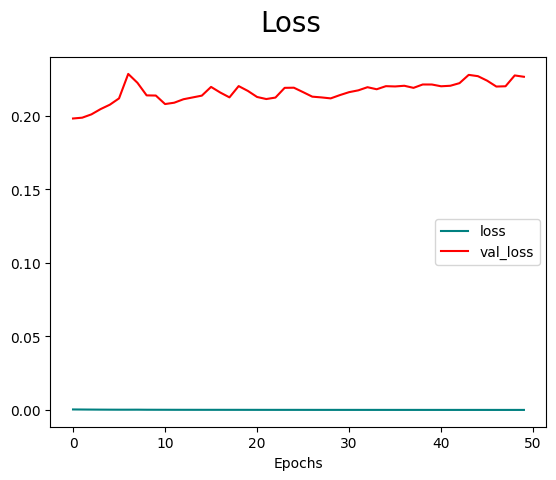

In [116]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss') # plotting using the hist dictionary
plt.plot(hist.history['val_loss'], color = 'red', label = 'val_loss')

fig.suptitle("Loss", fontsize = 20)
plt.legend()
plt.xlabel("Epochs")
plt.show()


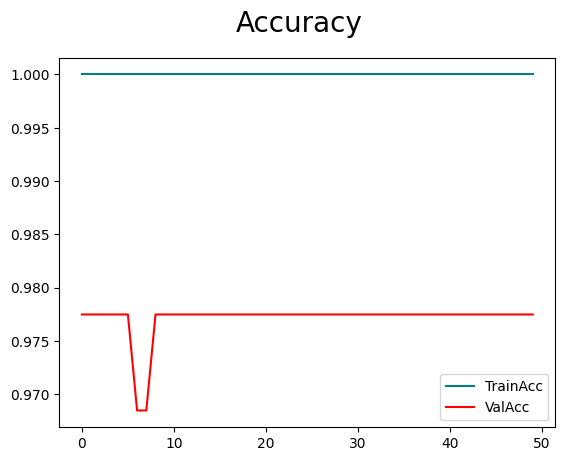

In [110]:
#hist.history
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'TrainAcc')
plt.plot(hist.history['val_accuracy'], color = 'red', label = 'ValAcc')

fig.suptitle("Accuracy", fontsize = 20)
plt.legend()
plt.show()

# Evaluation
Want to see how well this works on testing data

old code 
from tensorflow.keras.metrics import Precision, Recall ,  SparseCategoricalCrossentropy
#pre = Precision()
#re = Recall()
acc = SparseCategoricalCrossentropy()#SparseCategoricalCrossentropy() # might have to change this when we have more than 2 cats

In [111]:
loss, accuracy = model.evaluate(X_test, Y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9790 - loss: 0.2661 


In [112]:
#print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')


print("Loss" + str(loss), "accuracy"+ str(accuracy))

Loss0.2788144052028656 accuracy0.9684684872627258


# Testing one more operation

This is just proof that it works

<>:2: SyntaxWarning: invalid escape sequence '\L'
<>:2: SyntaxWarning: invalid escape sequence '\L'
C:\Users\tlgwo\AppData\Local\Temp\ipykernel_4968\2933358236.py:2: SyntaxWarning: invalid escape sequence '\L'
  img = cv.imread("dataset\L\L1_1_1.jpg")


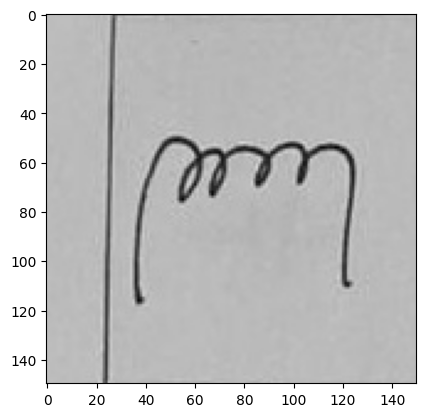

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
[[0.03990084 0.10545553 0.9999229  0.9927888 ]]
2
Inductor


In [113]:
#img = cv.imread("RandomCapTest.jpg")
img = cv.imread("dataset\L\L1_1_1.jpg") # this is from the training set so def sus 

#img = cv.canny(img,200,200)
resize = tf.image.resize(img,(256,256))
plt.imshow(img)
plt.show()


yhat = np.array(model.predict(np.expand_dims(resize/255,0))) # putting in in a list the nn can deal with not getting a batch
# note if greater that 0.5 it will be a R else cap
print(yhat)
cat = yhat.argmax()
print(cat)

match cat:
    case 0:
        print("A cap")
    case 1: 
        print("A diode")
    case 2: 
        print("Inductor")
    case 3:
        print("Resisor")


# 